Nama : Najwa Sofia

NPM : 24083010115

Kelas : Matematika Diskrit A

**Prompt GPT** : buat code lengkapnya, buat visualisasinya juga menggunakan file csv yang saya kirim dan buat codenya jagan di satukan biar saya gampang ngasih penjelasannya

Perintah Untuk membuat seluruh code awal

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

makan = pd.read_csv("makanan2.csv", delimiter=';')
makan.columns = makan.columns.str.strip()
print(makan.columns)
makan = makan.dropna(subset=['Harga'])

makan.head()

Index(['Makanan', 'Kenyang', 'Sehat', 'Rasa', 'Bosan', 'Harga'], dtype='object')


,Makanan,Kenyang,Sehat,Rasa,Bosan,Harga
0,Ayam Geprek,0.9,0.4,1.0,0.1,13000.0
1,Nasi Padang,1.0,0.5,0.8,0.2,24000.0
2,Mie Ayam,0.8,0.4,0.9,0.5,12000.0
3,Nasi Nugget,0.7,0.1,0.6,0.6,10000.0
4,Penyetan,0.9,0.6,0.7,0.3,20000.0


**Prompt GPT **: Bisa tambah batas minimal gizi atau variasi makanan (misalnya tidak makan makanan yang sama 5 hari berturut-turut), buat code ini

In [24]:
SAMPLE_NUM = 500
HARI = 31
budget_awal = 1e6
sampleid = np.arange(SAMPLE_NUM)
skor = np.zeros(SAMPLE_NUM)
sisa = np.zeros(SAMPLE_NUM)
sehat = np.zeros(SAMPLE_NUM)
resp_pilih = np.zeros((SAMPLE_NUM, HARI*2), dtype=np.int32)

for n in range(SAMPLE_NUM):
    budget = budget_awal
    skor_kumulatif = 0
    skor_sehat = 0

    for i in range(HARI):

        pilihan = np.random.randint(0, len(makan))
        while i >= 4 and all(resp_pilih[n][2*(i-k)] == pilihan for k in range(1,5)):
            pilihan = np.random.randint(0, len(makan))

        skor_kumulatif += makan['Sehat'].iloc[pilihan] + makan['Rasa'].iloc[pilihan]
        skor_sehat += makan['Sehat'].iloc[pilihan] - 0.5
        budget -= makan['Harga'].iloc[pilihan]
        resp_pilih[n][2*i] = pilihan

        pilihan = np.random.randint(0, len(makan))
        while i >= 4 and all(resp_pilih[n][2*(i-k)+1] == pilihan for k in range(1,5)):
            pilihan = np.random.randint(0, len(makan))

        skor_kumulatif += makan['Sehat'].iloc[pilihan] + makan['Rasa'].iloc[pilihan]
        skor_sehat += makan['Sehat'].iloc[pilihan] - 0.5
        budget -= makan['Harga'].iloc[pilihan]
        resp_pilih[n][2*i+1] = pilihan

    skor[n] = skor_kumulatif
    sehat[n] = skor_sehat
    sisa[n] = budget

Jawaban GPT : 🔎 Penjelasan:

1. i >= 4 → baru mulai cek setelah hari ke-5.

2. all(resp_pilih[n][2*(i-k)] == pilihan for k in range(1,5)) → memastikan makanan tidak sama dengan 4 hari sebelumnya.

In [25]:
idx_sehat_pos = np.where(sehat > 0)[0]
print(f"(1) Jumlah pola makan dengan skor sehat positif: {len(idx_sehat_pos)}")

idx_valid = idx_sehat_pos[sisa[idx_sehat_pos] > 0]
print(f"(2) Jumlah pola dengan skor sehat positif & sisa uang positif: {len(idx_valid)}")

if len(idx_valid) > 0:
    idx_best = idx_valid[np.argmax(skor[idx_valid])]
    print(f"(3) Simulasi terbaik ada di index {idx_best}")
    print(f"    Skor total   = {skor[idx_best]:.2f}")
    print(f"    Skor sehat   = {sehat[idx_best]:.2f}")
    print(f"    Sisa uang    = {sisa[idx_best]:,.0f}")
else:
    print("(3) Tidak ada pola yang memenuhi kondisi sehat>0 dan sisa uang>0")

(1) Jumlah pola makan dengan skor sehat positif: 2
(2) Jumlah pola dengan skor sehat positif & sisa uang positif: 2
(3) Simulasi terbaik ada di index 203
    Skor total   = 73.90
    Skor sehat   = 0.80
    Sisa uang    = 287,500


In [26]:
if len(idx_valid) > 0:
    print("\n(4) Jadwal makan simulasi terbaik:")
    for hari in range(HARI):
        pagi = makan['Makanan'].iloc[int(resp_pilih[idx_best, 2*hari])]
        malam = makan['Makanan'].iloc[int(resp_pilih[idx_best, 2*hari+1])]
        print(f"Hari {hari+1}: Pagi = {pagi}, Malam = {malam}")


(4) Jadwal makan simulasi terbaik:
Hari 1: Pagi = Nasi Padang, Malam = Nasi Pecel 
Hari 2: Pagi = Mie Ayam, Malam = Gorengan
Hari 3: Pagi = Warteg, Malam = Capcay
Hari 4: Pagi = Nasi Pecel , Malam = Capcay
Hari 5: Pagi = Penyetan, Malam = Nasi Pecel 
Hari 6: Pagi = Nasi Telur, Malam = Roti
Hari 7: Pagi = Nasi Telur, Malam = Nasi Pecel 
Hari 8: Pagi = Penyetan, Malam = Ayam Geprek
Hari 9: Pagi = Mie Ayam, Malam = Roti
Hari 10: Pagi = Capcay, Malam = Capcay
Hari 11: Pagi = Mie Ayam, Malam = Nasi Goreng
Hari 12: Pagi = Nasi Pecel , Malam = Gorengan
Hari 13: Pagi = Roti, Malam = Capcay
Hari 14: Pagi = Warteg, Malam = Mie Ayam
Hari 15: Pagi = Penyetan, Malam = Nasi Goreng
Hari 16: Pagi = Penyetan, Malam = Penyetan
Hari 17: Pagi = Ayam Geprek, Malam = Warteg
Hari 18: Pagi = Warteg, Malam = Nasi Pecel 
Hari 19: Pagi = Nasi Padang, Malam = Roti
Hari 20: Pagi = Nasi Telur, Malam = Warteg
Hari 21: Pagi = Nasi Pecel , Malam = Nasi Pecel 
Hari 22: Pagi = Nasi Padang, Malam = Nasi Pecel 
Hari 23: 

**Prompt GPT **: visualisasi menggunakan 2d saja

Jawaban GPT : Oke sip 👍 kalau mau visualisasi 2D saja, kita bisa buat beberapa plot sederhana untuk menjelaskan hasil:

1. Scatter Plot → Menampilkan hubungan antara sisa_uang (X) dan resp_sehat (Y), lalu diberi warna sesuai skor.

2. Bar Plot → Menampilkan jadwal makan terbaik selama 31 hari (hari di sumbu X, makanan pagi/malam di sumbu Y).

Prompt GPT : fungsi visualisasi scatter plot nya untuk apa

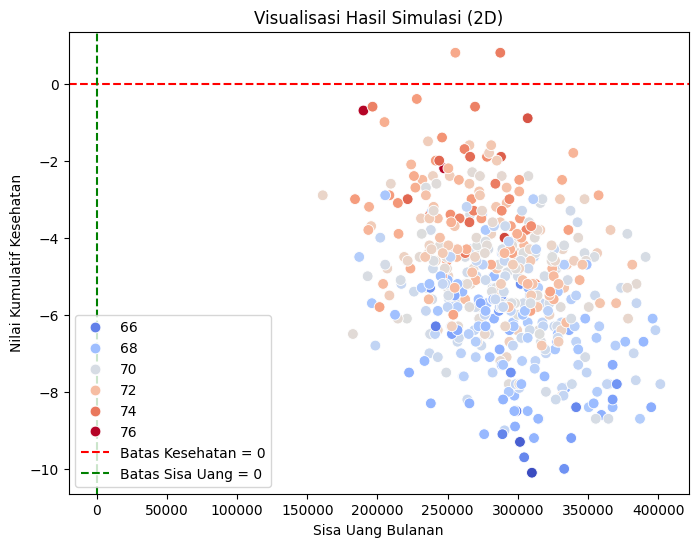

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=sisa, y=sehat, hue=skor, palette="coolwarm", s=60)
plt.axhline(0, color='red', linestyle='--', label="Batas Kesehatan = 0")
plt.axvline(0, color='green', linestyle='--', label="Batas Sisa Uang = 0")
plt.xlabel("Sisa Uang Bulanan")
plt.ylabel("Nilai Kumulatif Kesehatan")
plt.title("Visualisasi Hasil Simulasi (2D)")
plt.legend()
plt.show()

Jawaban GPT : Good question 👍

Fungsi **scatter plot** di kasus ini adalah untuk:

1. **Melihat hubungan antar variabel utama**

   * Sumbu X → **sisa uang bulanan**
   * Sumbu Y → **nilai kumulatif kesehatan (resp_sehat)**
   * Warna titik → **skor total**

   Jadi, tiap titik mewakili **satu kombinasi pola makan** yang sudah disimulasikan.

2. **Membedakan mana pola yang valid / tidak**

   * Titik di **kanan garis hijau (X > 0)** → artinya uang masih tersisa.
   * Titik di **atas garis merah (Y > 0)** → artinya sehat secara kumulatif.
   * Kalau keduanya terpenuhi → kombinasi itu termasuk pola makan yang **layak**.

3. **Membandingkan skor antar solusi**

   * Warna titik menunjukkan **tinggi/rendahnya skor**.
   * Jadi kita bisa langsung lihat titik mana yang paling bagus (skor tinggi, sehat, dan uang tidak minus).

⚡ Intinya: scatter plot membantu kita **visual check** apakah simulasi benar-benar menghasilkan solusi sehat + hemat, bukan sekadar angka di tabel.


**Prompt GPT** : coba buat diagram batang juga

Diagram batang ini untuk melihat perbandingan pengeluaran setiap harinya

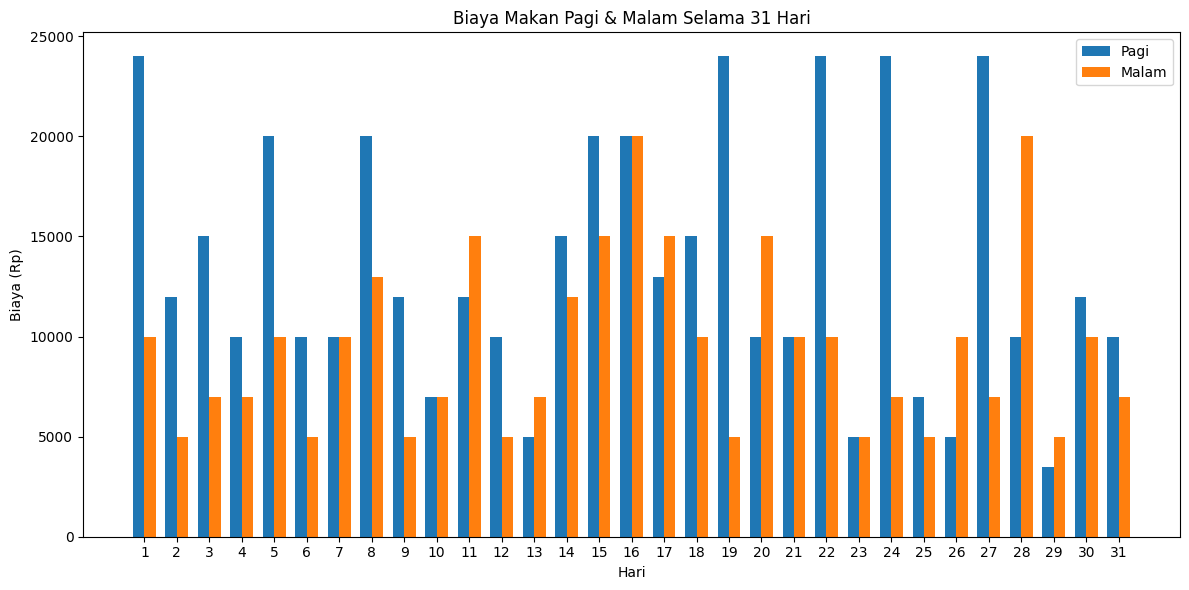

In [28]:
hari = np.arange(1, HARI+1)

pagi_list = [makan['Makanan'].iloc[int(resp_pilih[idx_best, 2*h])] for h in range(HARI)]
malam_list = [makan['Makanan'].iloc[int(resp_pilih[idx_best, 2*h+1])] for h in range(HARI)]

biaya_pagi = [makan['Harga'].iloc[int(resp_pilih[idx_best, 2*h])] for h in range(HARI)]
biaya_malam = [makan['Harga'].iloc[int(resp_pilih[idx_best, 2*h+1])] for h in range(HARI)]

x = np.arange(HARI)
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, biaya_pagi, width, label='Pagi')
rects2 = ax.bar(x + width/2, biaya_malam, width, label='Malam')

ax.set_xlabel("Hari")
ax.set_ylabel("Biaya (Rp)")
ax.set_title("Biaya Makan Pagi & Malam Selama 31 Hari")
ax.set_xticks(x)
ax.set_xticklabels(hari)
ax.legend()

plt.tight_layout()
plt.show()

Jawaban GPT : Sip, kalau mau diagram batang (bar chart) kita bisa tunjukkan distribusi komponen hasil simulasi.
Misalnya:

1. Sumbu X = Hari ke-1 sampai Hari ke-31

2. Sumbu Y = Skor kesehatan per hari (atau bisa juga biaya per hari)

3. Warna batang = menandai pilihan makanan (pagi/malam)

Kalau mau lebih simpel, kita bisa langsung buat 2 batang per hari:

1. batang pertama = makanan pagi

2. batang kedua = makanan malam

**prompt GPT **: Bisa ditambahkan distribusi skor sehat, skor total, sisa uang untuk semua 500 simulasi → pakai histogram/violin plot, buat code ini

Jawaban GPT : Mantap, itu ide bagus 👍

Kita bisa bikin distribusi untuk semua hasil skor, sehat, dan sisa dari 500 simulasi. Bisa coba dua visualisasi: histogram untuk sebaran nilai dan violin plot untuk bentuk distribusinya.

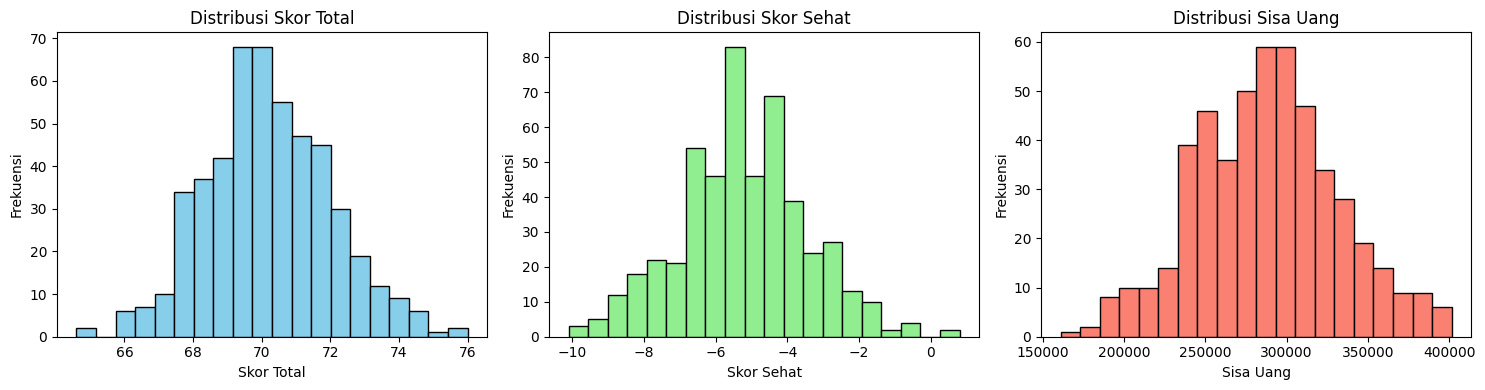

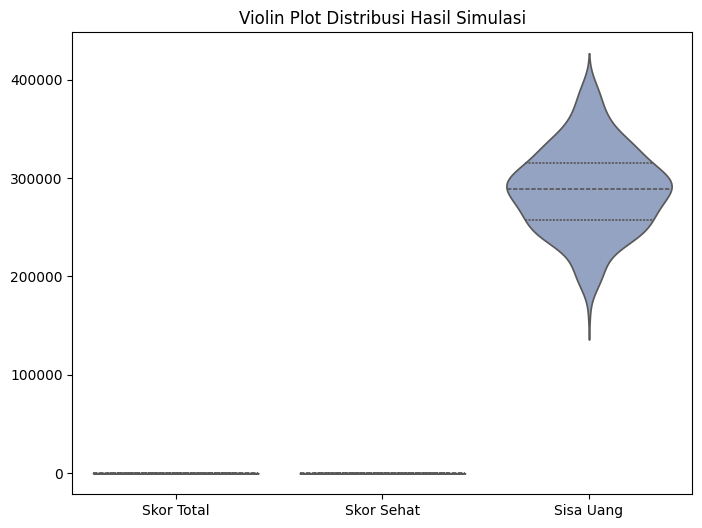

In [29]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.hist(skor, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Skor Total")
plt.ylabel("Frekuensi")
plt.title("Distribusi Skor Total")

plt.subplot(1,3,2)
plt.hist(sehat, bins=20, color='lightgreen', edgecolor='black')
plt.xlabel("Skor Sehat")
plt.ylabel("Frekuensi")
plt.title("Distribusi Skor Sehat")

plt.subplot(1,3,3)
plt.hist(sisa, bins=20, color='salmon', edgecolor='black')
plt.xlabel("Sisa Uang")
plt.ylabel("Frekuensi")
plt.title("Distribusi Sisa Uang")

plt.tight_layout()
plt.show()


data_all = {
    "Skor Total": skor,
    "Skor Sehat": sehat,
    "Sisa Uang": sisa
}

plt.figure(figsize=(8,6))
sns.violinplot(data=pd.DataFrame(data_all), inner="quartile", palette="Set2")
plt.title("Violin Plot Distribusi Hasil Simulasi")
plt.show()

**Prompt GPT** : apa ini maksudnya

Jawaban GPT : Oke, aku jelaskan interpretasi dari plot yang kamu hasilkan 👇

---

### 1. **Histogram**

* **Skor Total** (kiri):

  * Nilainya terkumpul di sekitar **69–71**.
  * Artinya, sebagian besar simulasi menghasilkan skor total mirip-mirip, distribusinya seperti *normal distribution* (lonceng).
* **Skor Sehat** (tengah):

  * Kebanyakan ada di kisaran **-7 sampai -4**.
  * Banyak simulasi malah menghasilkan skor sehat **negatif**, artinya menu yang terpilih rata-rata kurang sehat.
* **Sisa Uang** (kanan):

  * Mayoritas sisa uang antara **250.000–320.000**.
  * Artinya, dengan budget 1 juta, rata-rata masih tersisa seperempat hingga sepertiga uang.

---

### 2. **Violin Plot**

* Grafik ini menggabungkan boxplot + kepadatan data.
* Kamu lihat di sini:

  * **Sisa Uang** punya variasi lebar (rentang besar, 150 ribu – 400 ribu), makanya bentuk violinnya besar dan terlihat distribusinya.
  * **Skor Total** dan **Skor Sehat** kelihatan “nempel di bawah” → itu karena skalanya kecil (sekitar 60–75 untuk skor total, -10 sampai 0 untuk sehat) dibanding dengan sisa uang yang ratusan ribu.
    Jadi seakan-akan pipih di bawah, padahal sebenarnya ada variasinya tapi kecil dibanding sisa uang.

---

### Intinya

* Kalau dilihat **skor sehat**, justru kebanyakan simulasi *kurang sehat* (nilai negatif).
* **Sisa uang** cukup tinggi, artinya pola makan yang dipilih cenderung hemat tapi tidak sehat.
* **Skor total** stabil, tidak jauh berbeda antar simulasi.

---

👉 Supaya violin plot lebih “terbaca”, sebaiknya kamu **plot per variabel secara terpisah**, atau **distandardisasi (normalisasi)** dulu datanya biar skala sama.
